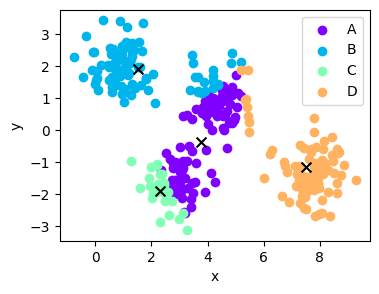

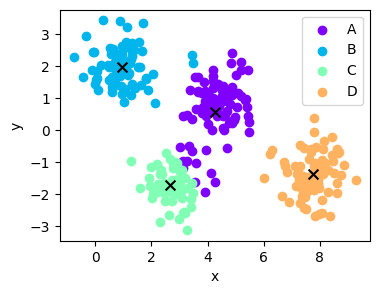

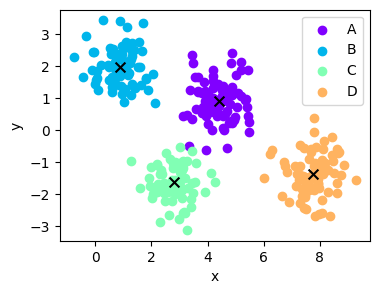

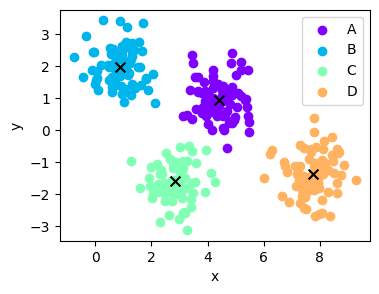

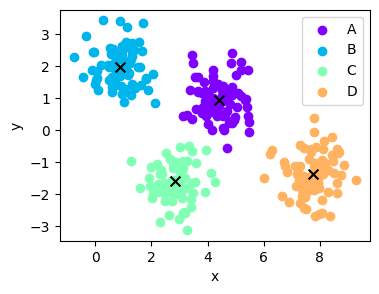

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'cdata.csv')#用pandas裡的方法讀檔
point = df[['x', 'y']].values#取出每個資料點的值
K = 4

np.random.seed(123)
centroids = point[np.random.choice(point.shape[0], K, replace=False)]#隨機選取4個不重複的參考點

#計算Euclidean Distance
def ed(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

#畫圖
def plot(point, centroids, labels):
    plt.figure(figsize=(4, 3))
    cmap = plt.get_cmap('rainbow')#動態獲取顏色
    colors = [cmap(i / K) for i in range(K)]
    for i in range(K):#畫出資料點
        cluster_points = point[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'{chr(65+i)}')

    #畫出參考點
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=50)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def kmeans(point, centroids, max=100, tol=1e-4):
    for i in range(max):
        distances = np.array([ed(point, centroid) for centroid in centroids])#找出每個點跟所有資料點的距離，存成2維陣列
        labels = np.argmin(distances, axis=0)#提出所有值裡最小的，返回索引

        new_centroids = np.array([point[labels == k].mean(axis=0) for k in range(K)])#更新參考點

        plot(point, new_centroids, labels)

        if np.all(np.abs(new_centroids - centroids) < tol):#若幾乎不再變動，則停止
            break

        centroids = new_centroids


kmeans(point, centroids)


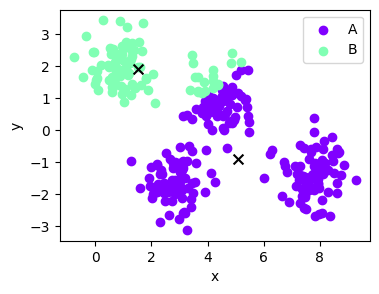

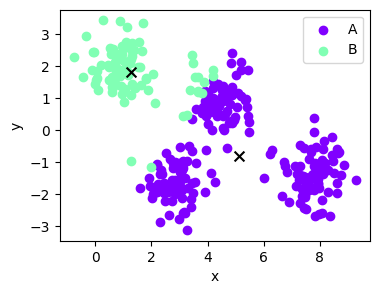

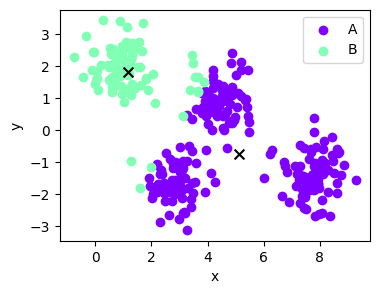

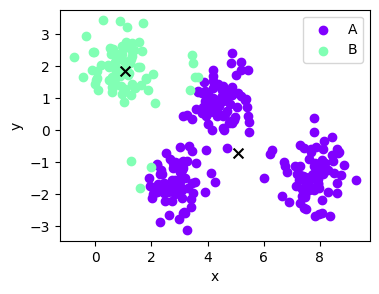

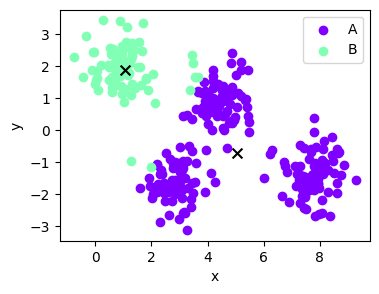

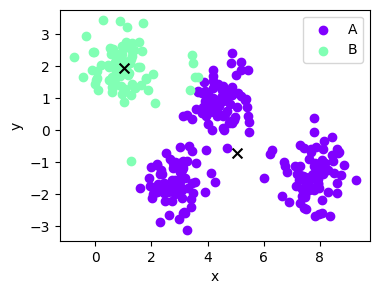

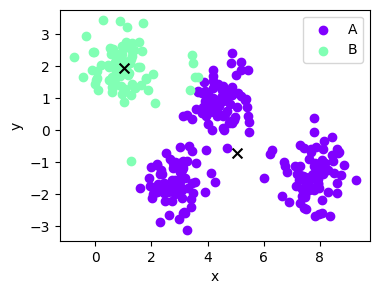

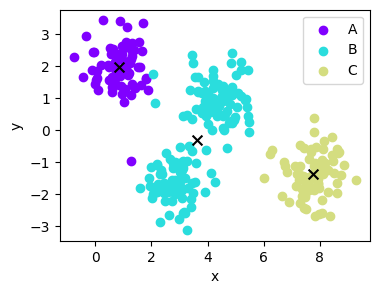

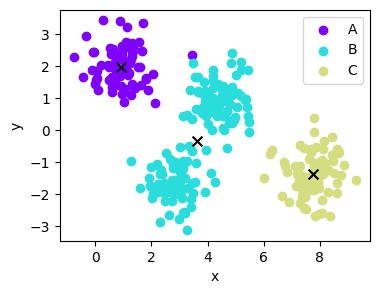

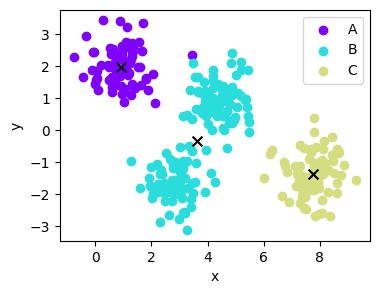

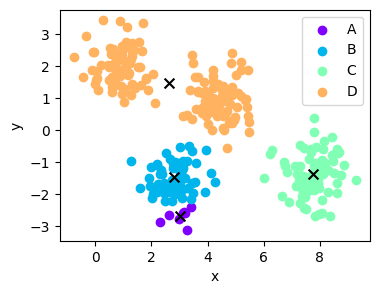

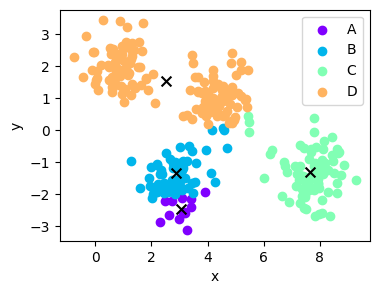

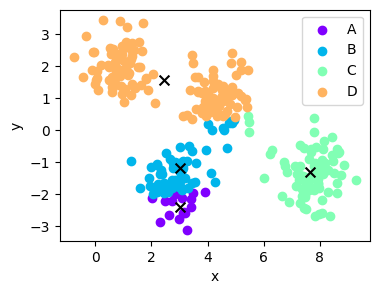

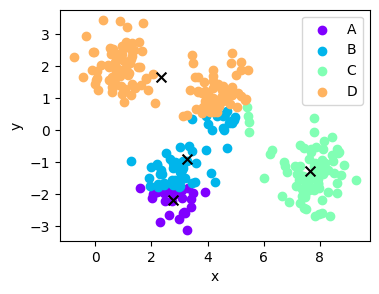

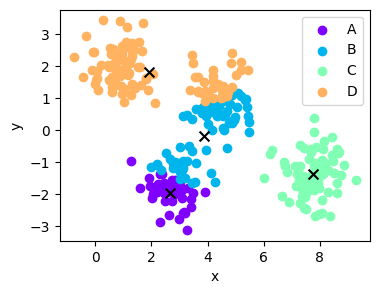

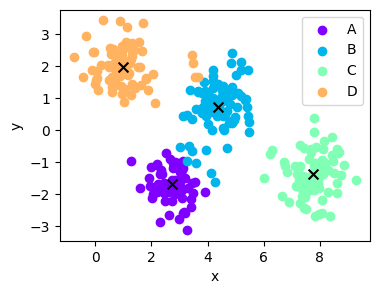

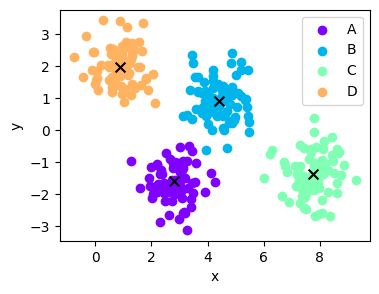

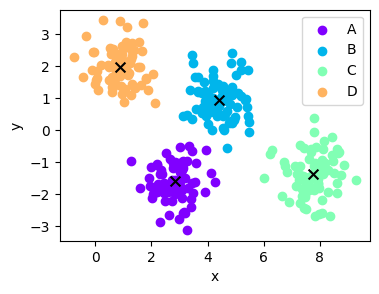

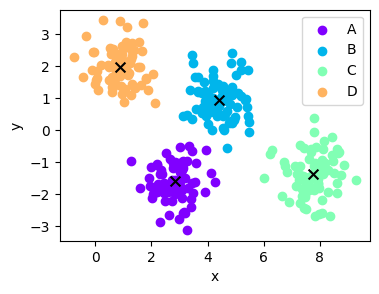

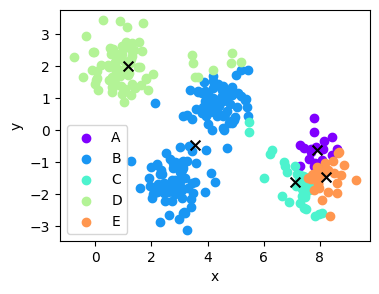

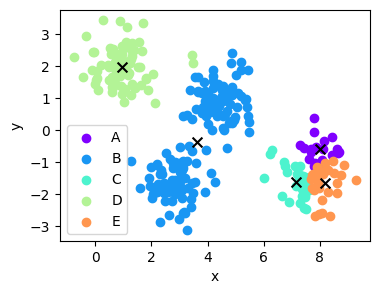

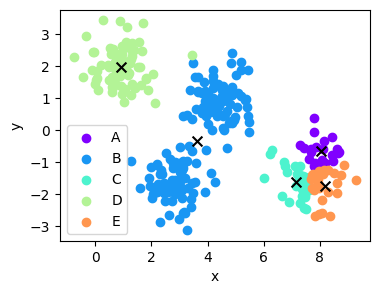

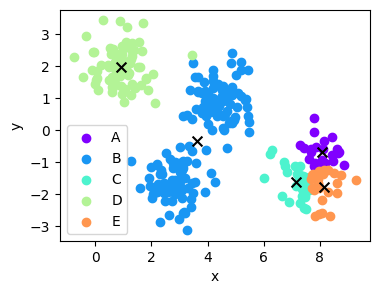

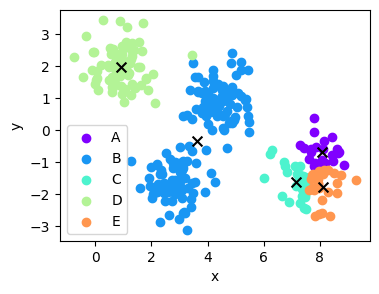

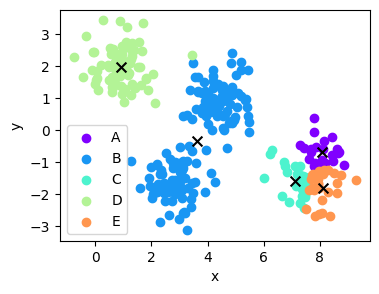

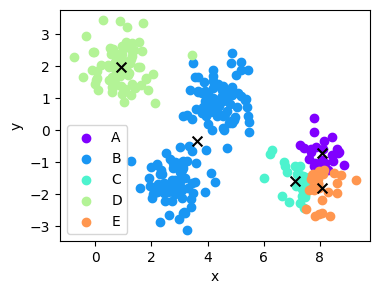

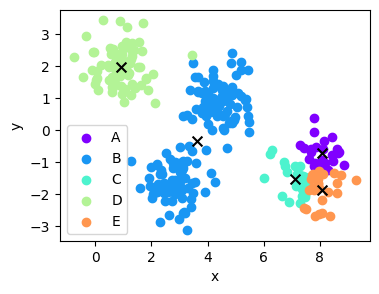

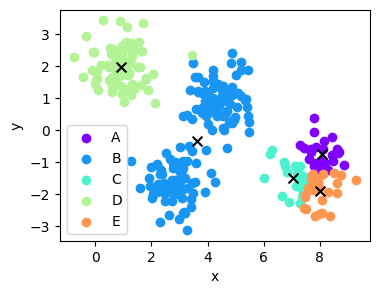

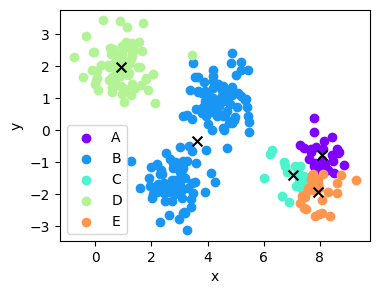

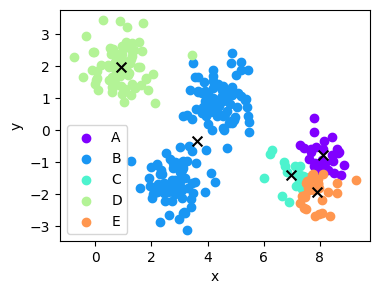

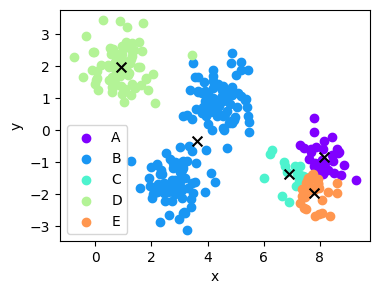

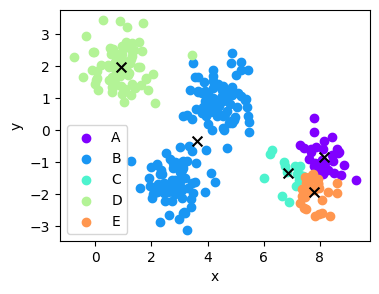

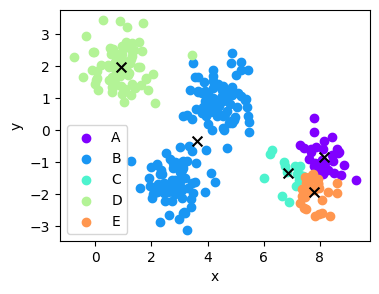

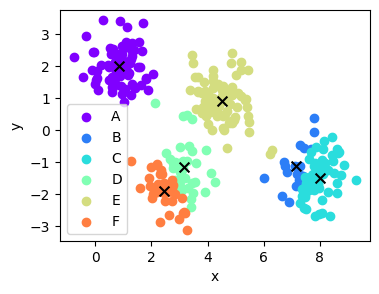

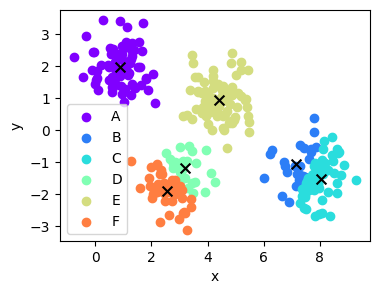

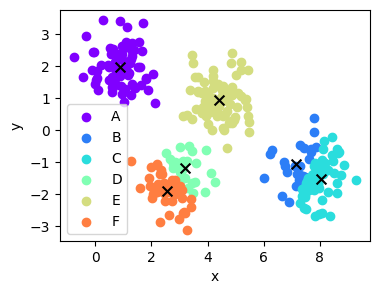

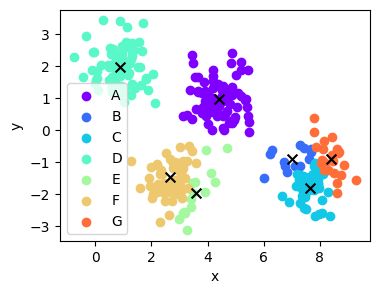

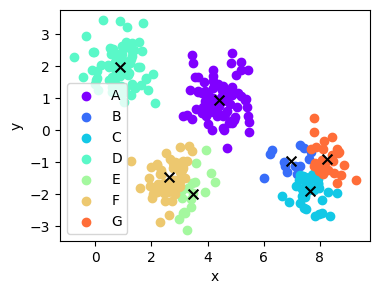

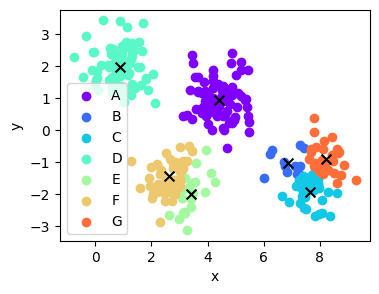

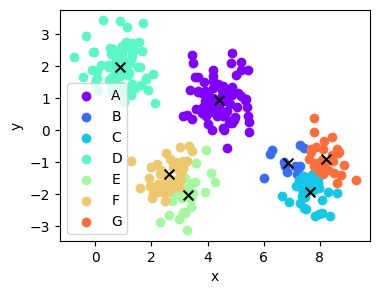

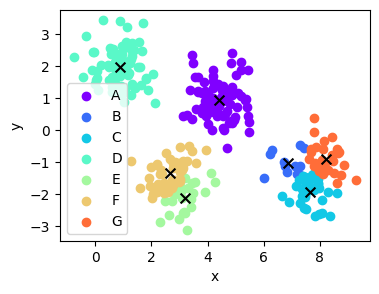

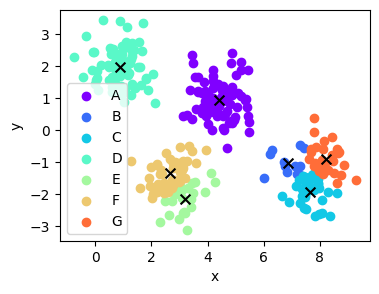

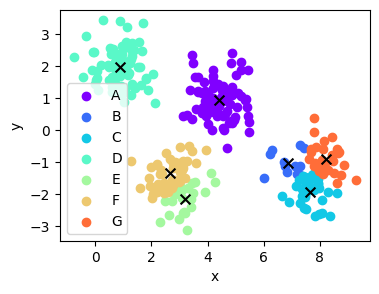

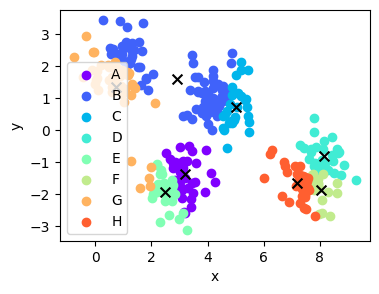

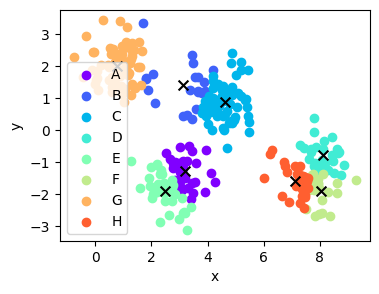

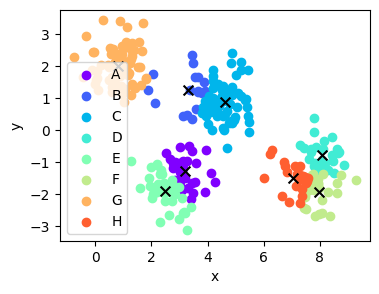

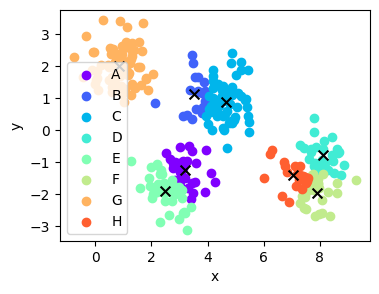

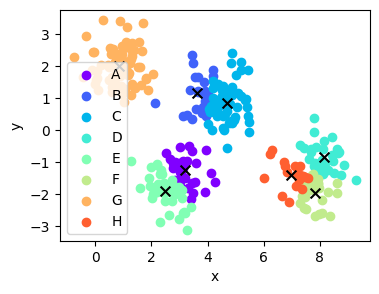

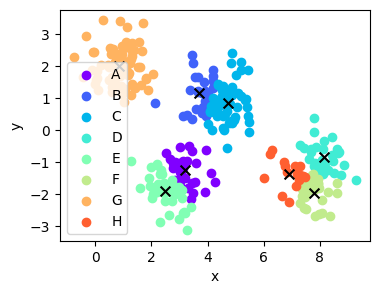

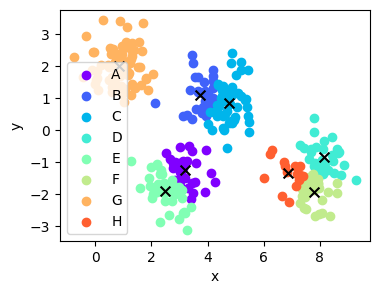

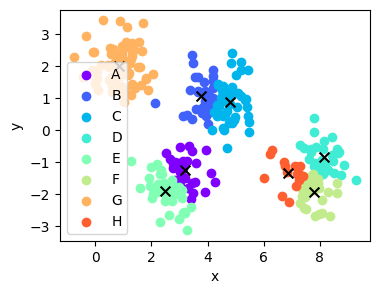

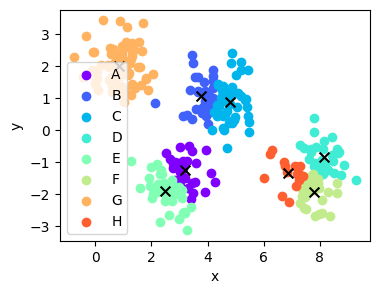

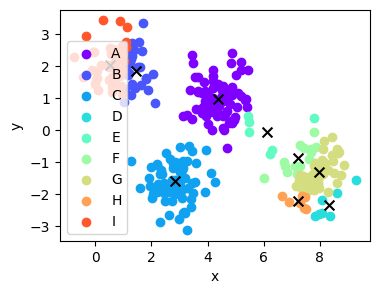

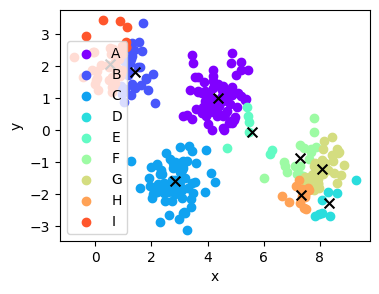

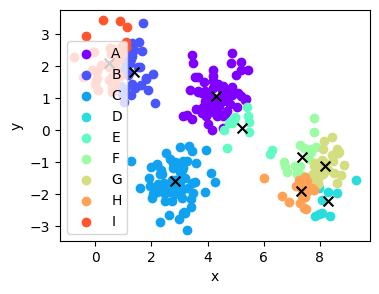

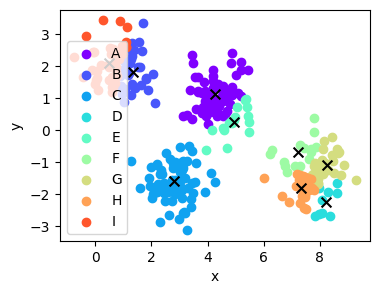

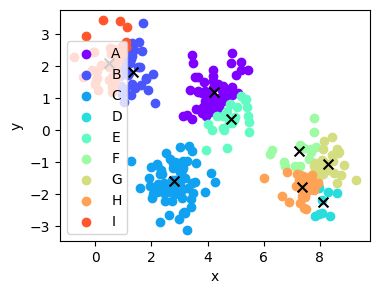

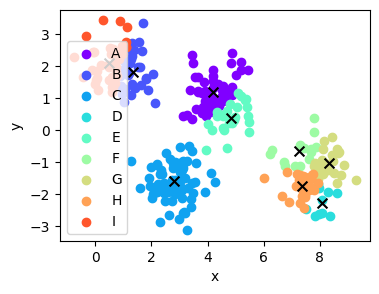

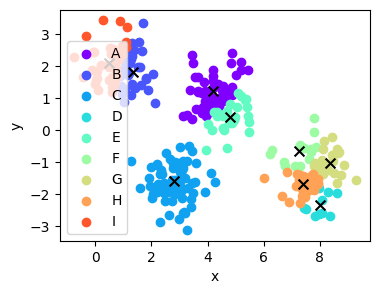

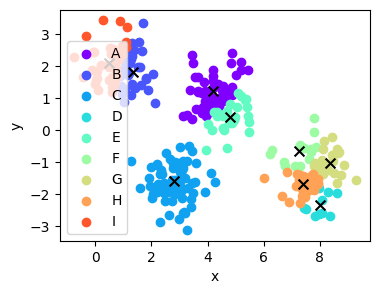

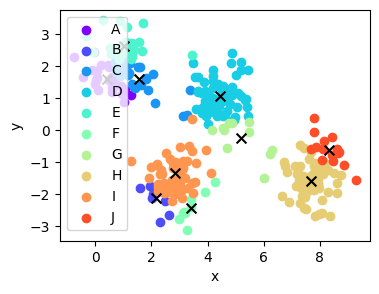

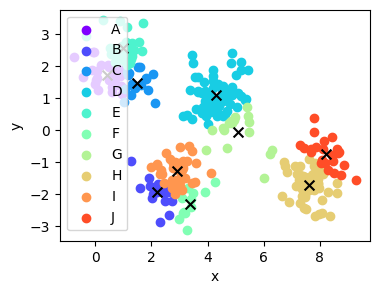

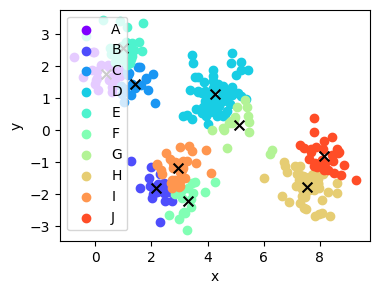

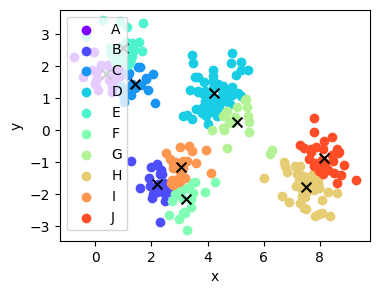

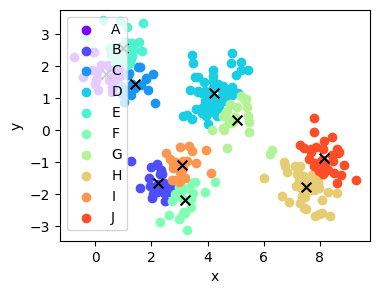

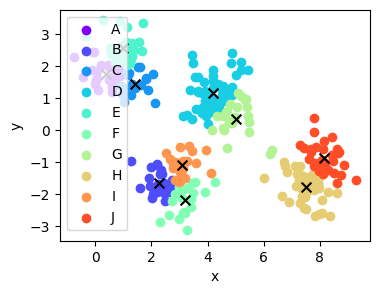

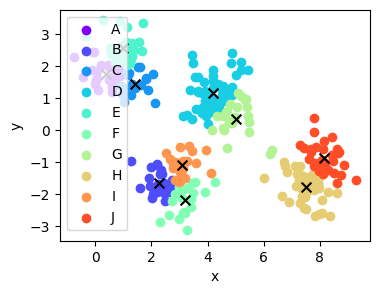

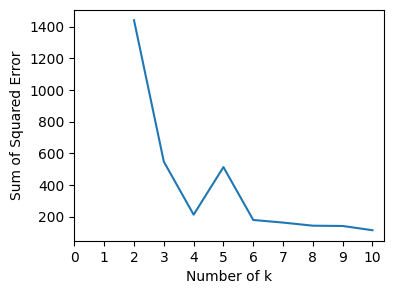

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)
def kmeans(point, K, max_iters=100, tol=1e-4):
    centroids = point[np.random.choice(point.shape[0], K, replace=False)]
    sse_list = []

    for i in range(max_iters):
        distances = np.array([ed(point, centroid) for centroid in centroids])
        labels = np.argmin(distances, axis=0)

        new_centroids = np.array([point[labels == k].mean(axis=0) for k in range(K)])

        sse = np.sum((point - centroids[labels]) ** 2)#算出sse值
        sse_list.append(sse)#存到list

        plot(point, new_centroids, labels)

        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return sse_list[-1]#返回最新計算出的值

sse_values = []
K_values = range(2, 11)

for K in K_values:
    sse = kmeans(point, K)
    sse_values.append(sse)
    
#畫折線圖
plt.figure(figsize=(4, 3))
plt.plot(K_values, sse_values, marker='')
plt.xlabel('Number of k')
plt.ylabel('Sum of Squared Error')
plt.xticks(range(0,11))
plt.show()

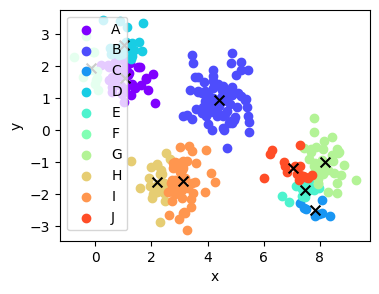

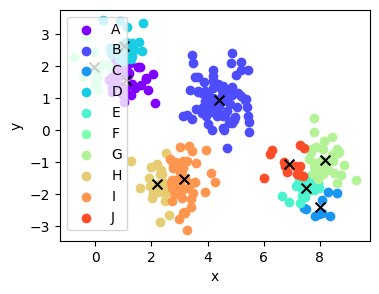

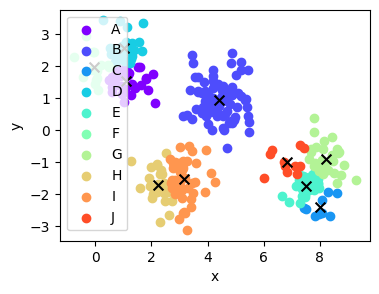

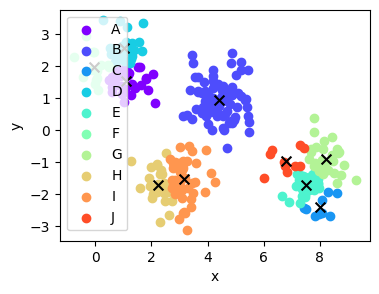

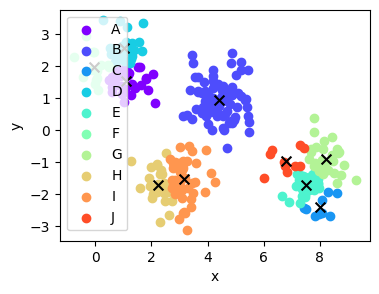

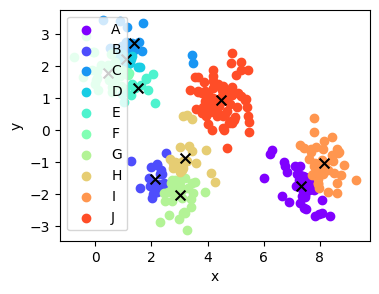

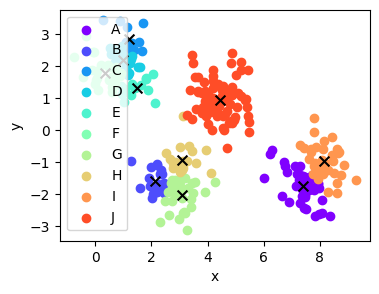

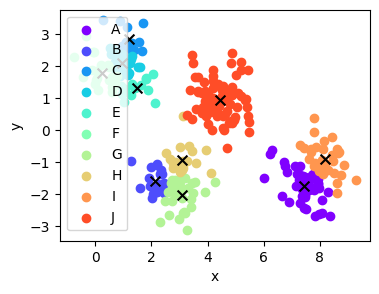

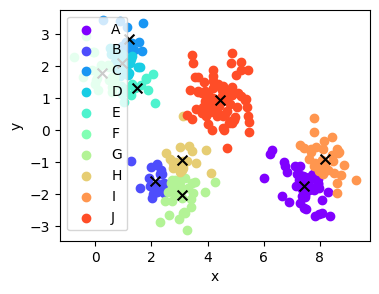

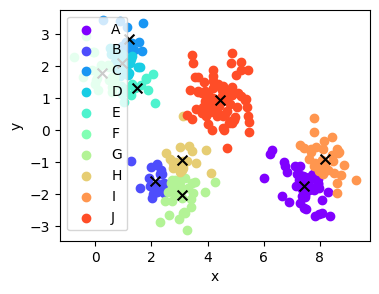

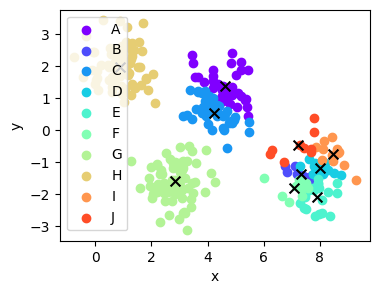

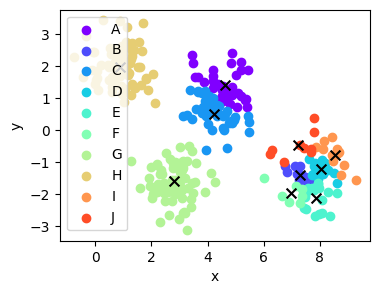

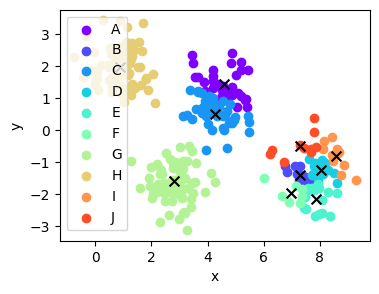

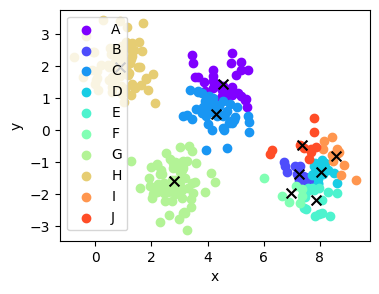

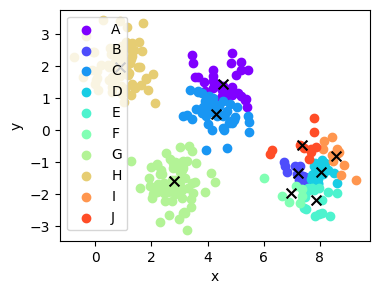

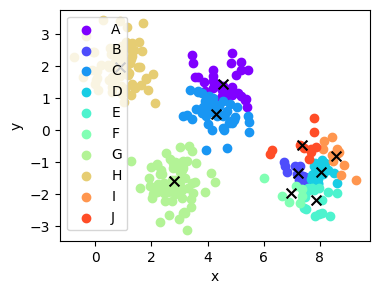

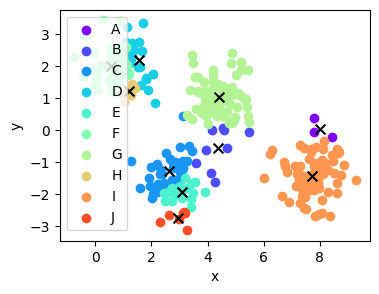

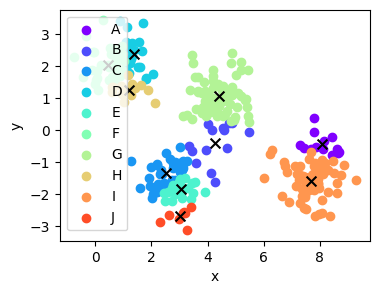

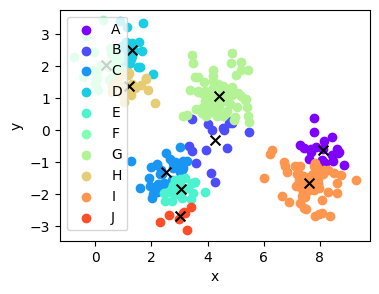

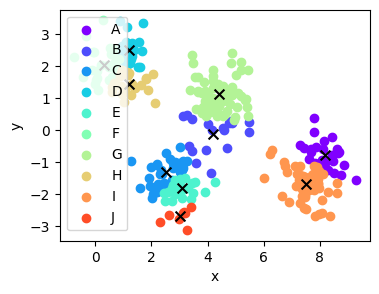

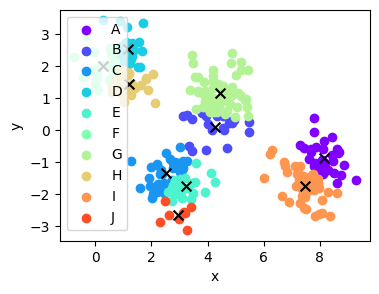

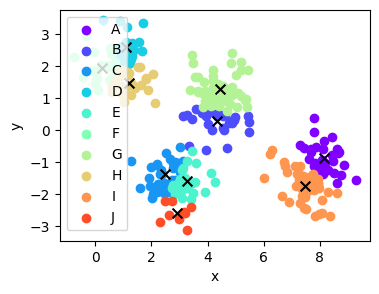

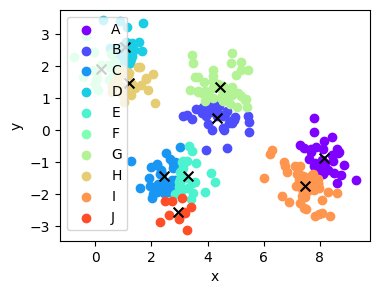

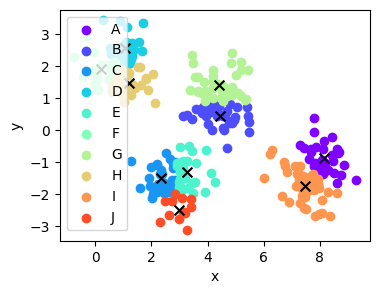

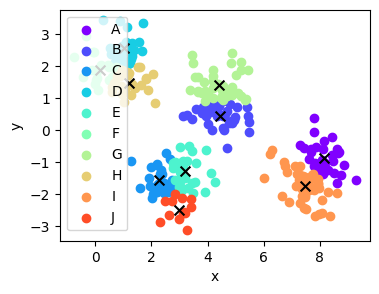

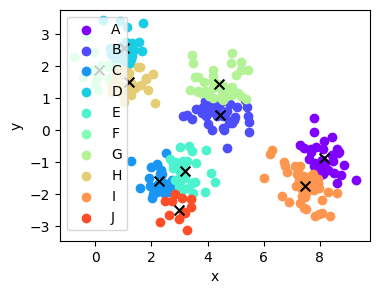

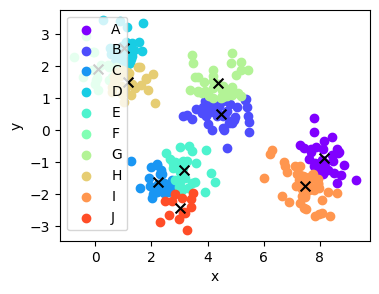

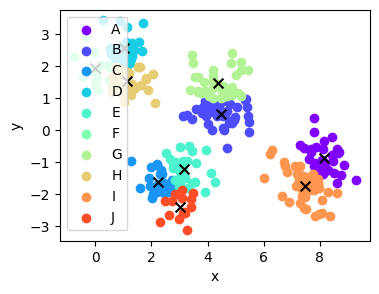

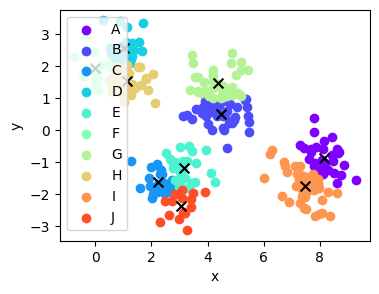

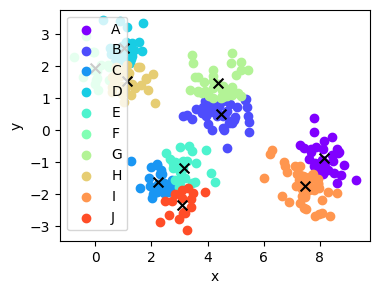

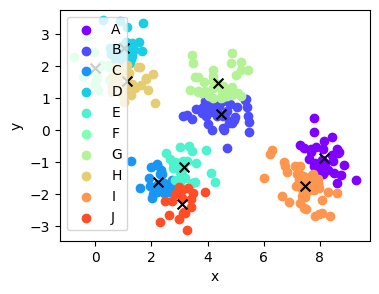

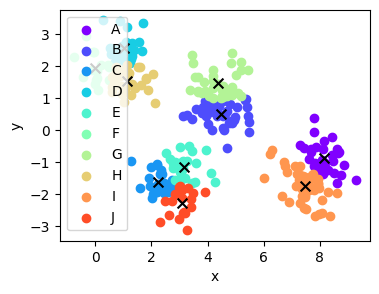

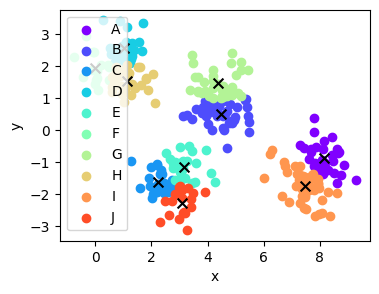

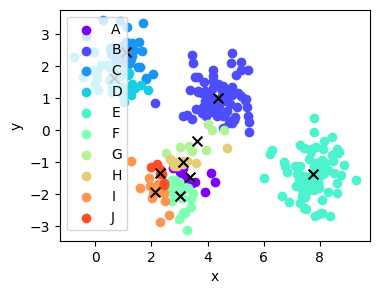

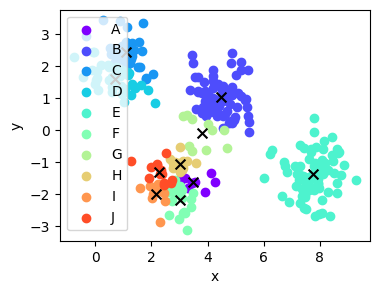

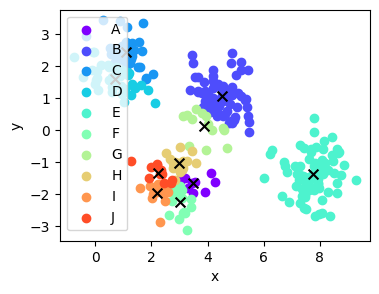

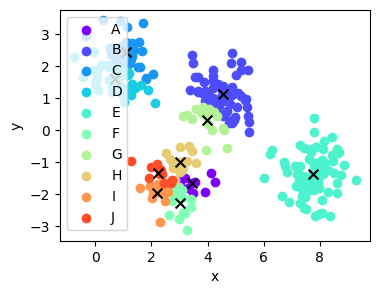

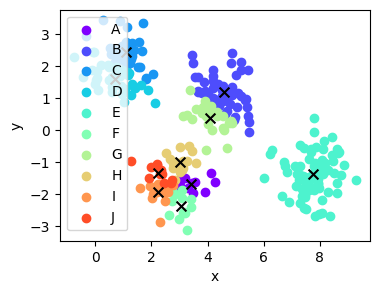

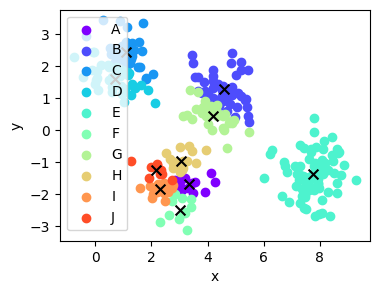

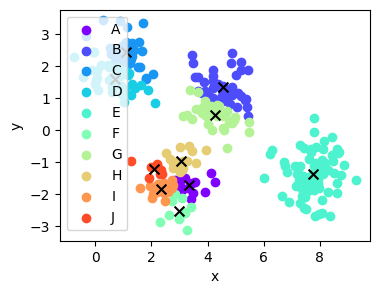

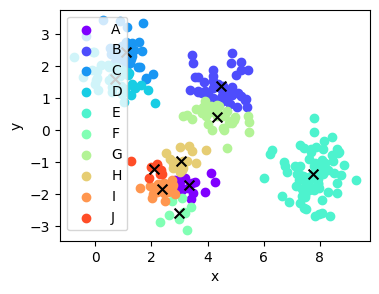

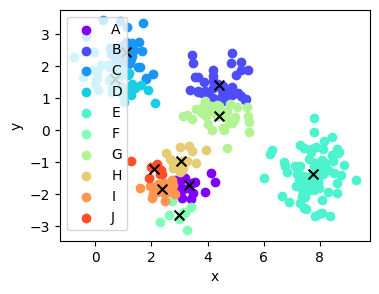

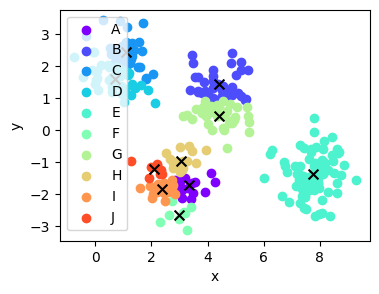

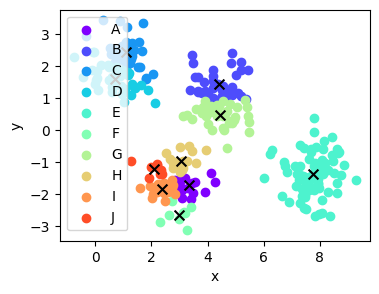

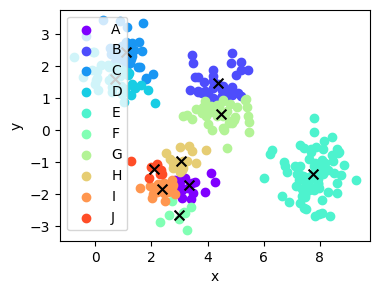

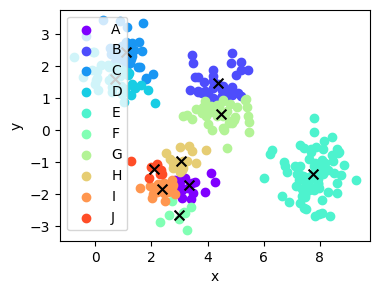

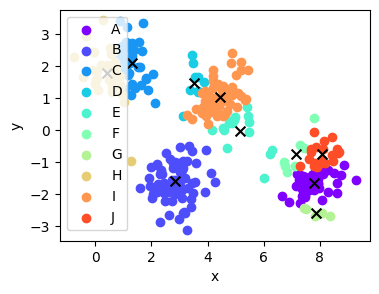

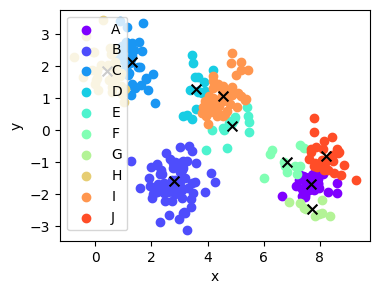

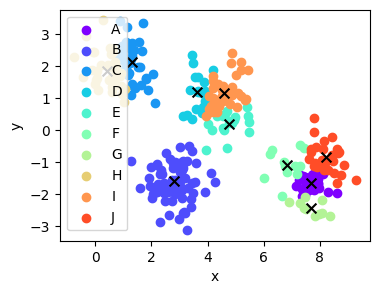

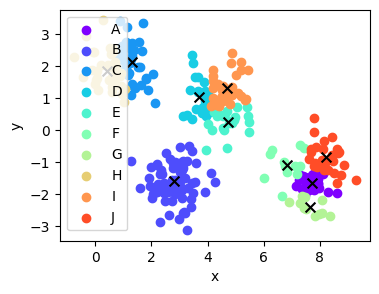

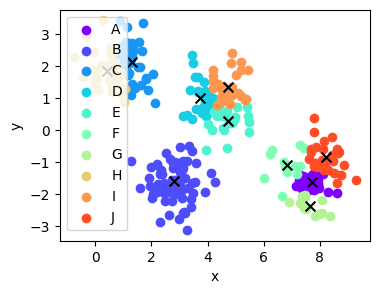

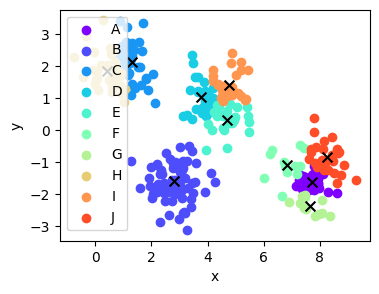

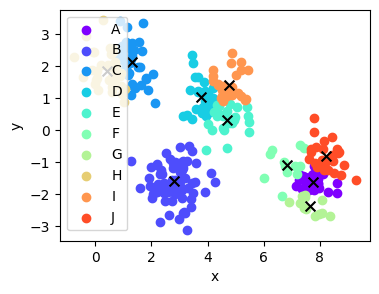

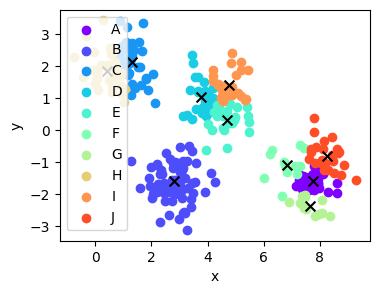

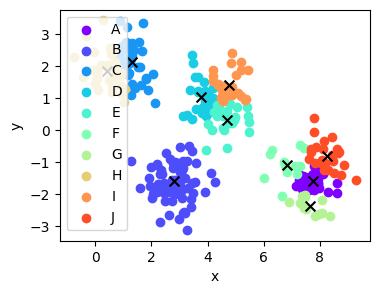

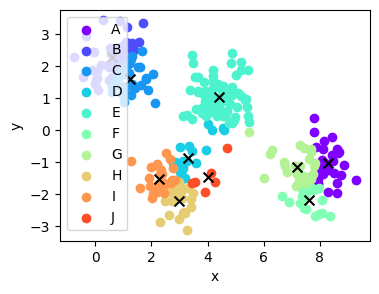

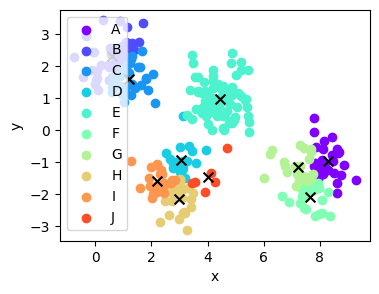

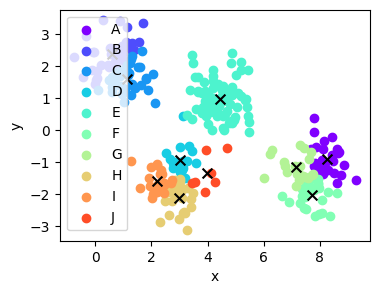

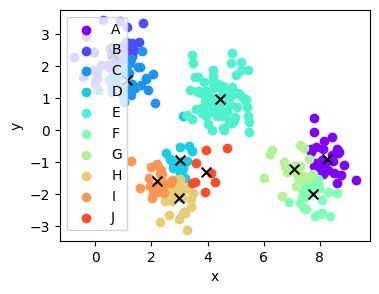

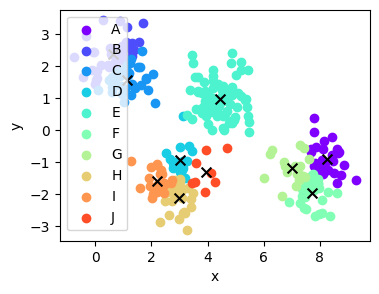

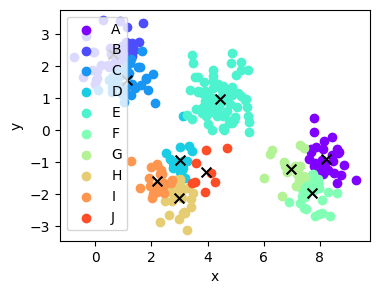

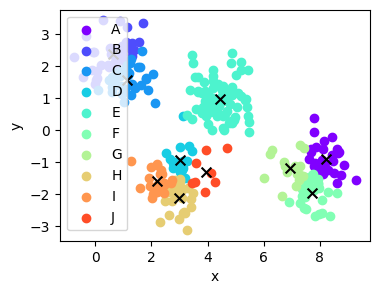

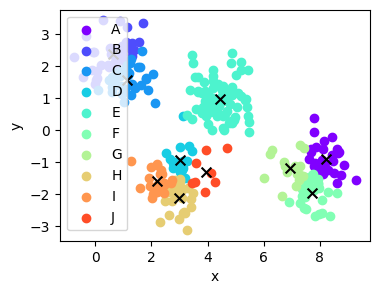

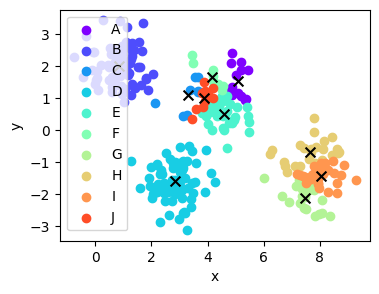

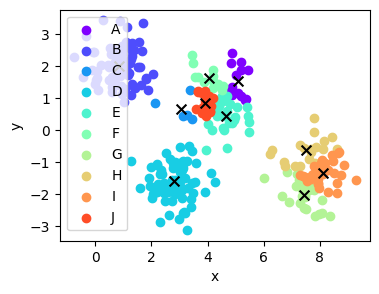

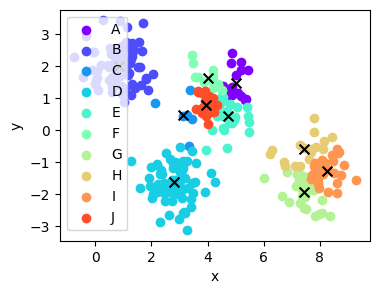

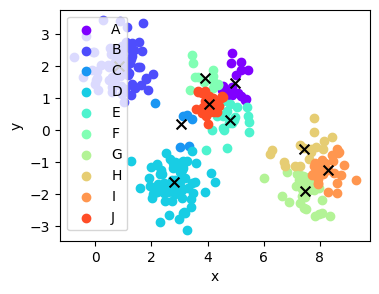

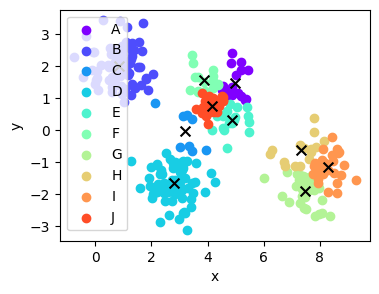

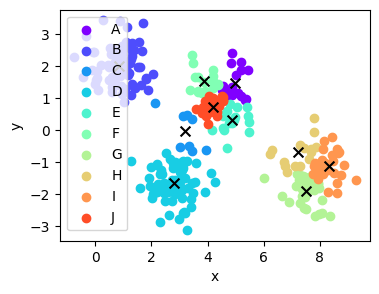

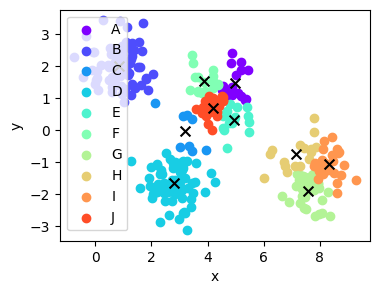

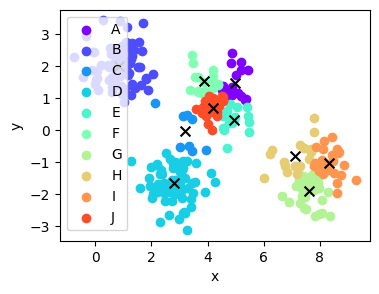

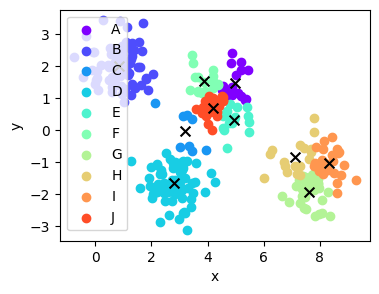

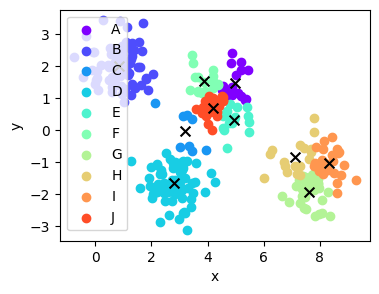

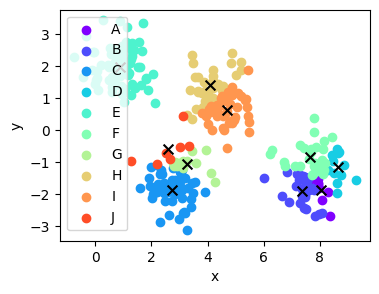

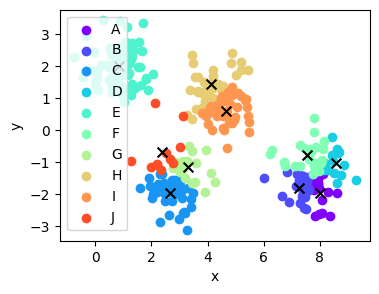

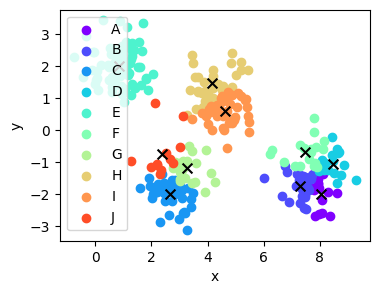

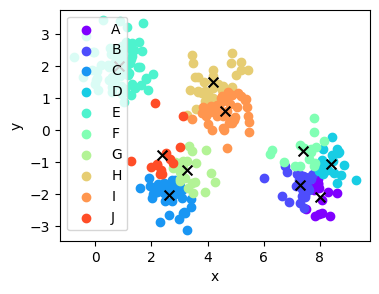

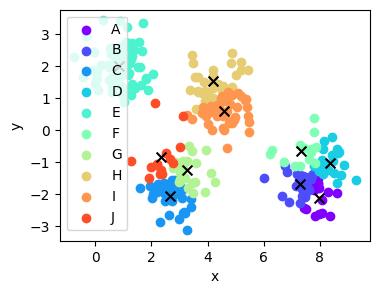

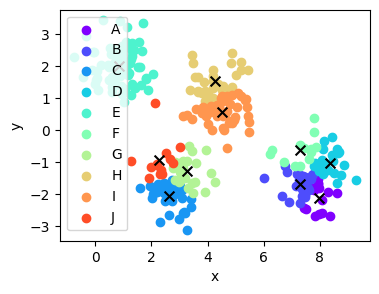

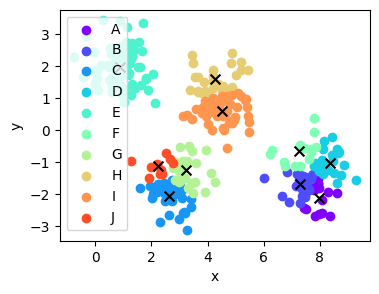

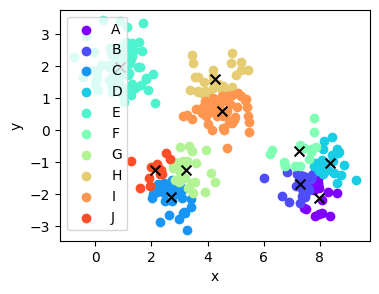

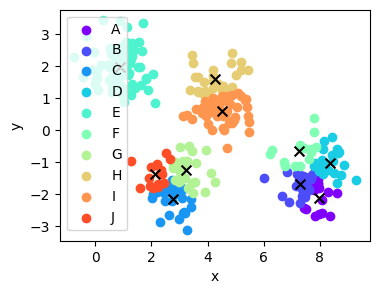

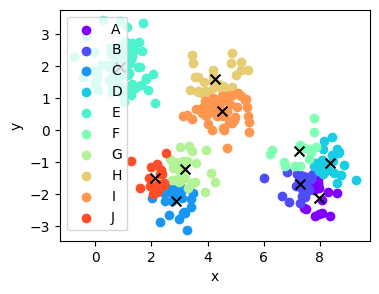

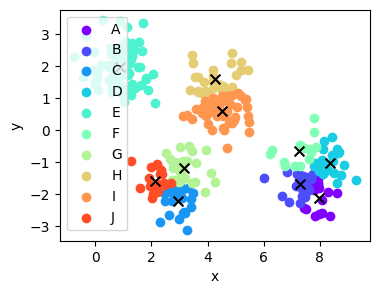

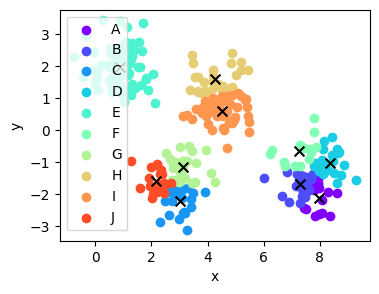

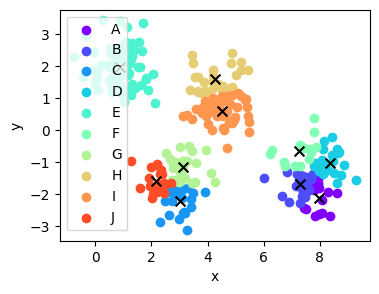

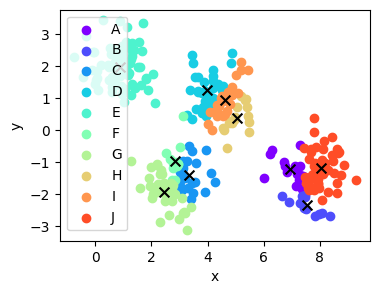

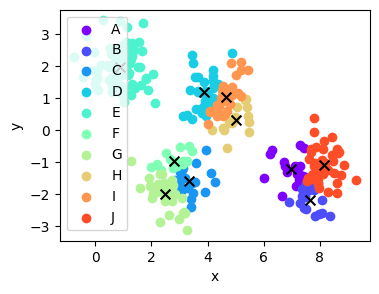

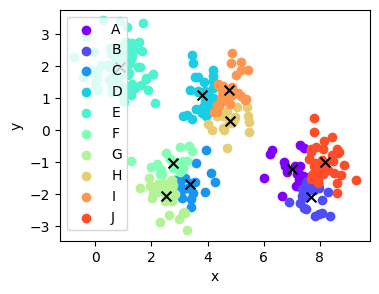

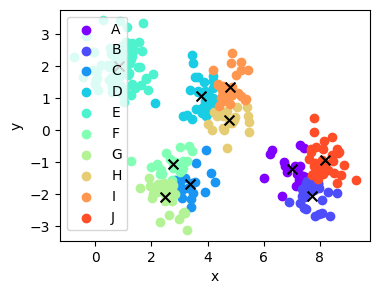

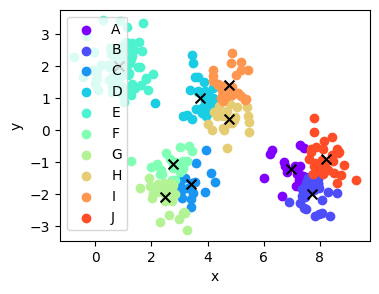

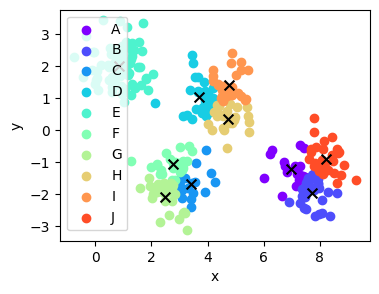

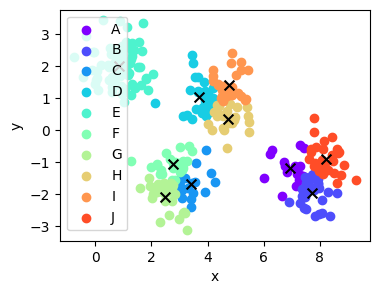

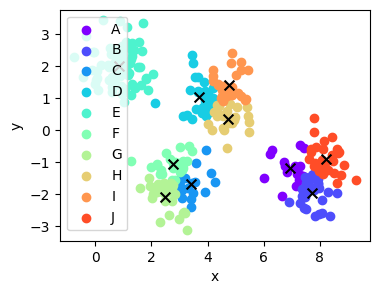

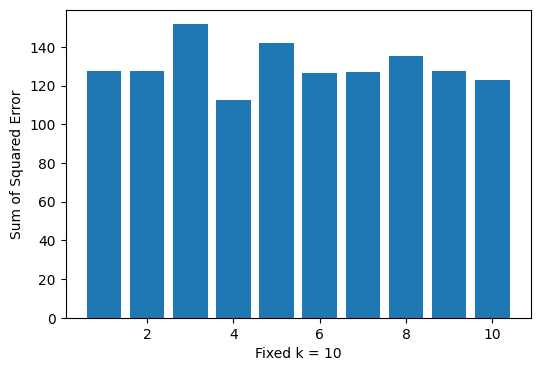

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed()
iterations = 10 #執行次數
sse_values = [] #存計算出來的值

for i in range(iterations):#跑10次，把值append到sse_value裡
    sse = kmeans(point, K)
    sse_values.append(sse)

#畫長條圖
plt.figure(figsize=(6, 4))
plt.bar(range(1, iterations+1), sse_values)
plt.xlabel('Fixed k = 10')
plt.ylabel('Sum of Squared Error')
plt.show()